# Setting

In [1]:
import bt
import FinanceDataReader as fdr
import pandas as pd

from pf_utils import import_rate1, import_rate2, get_price
from pf_utils import Backtest, get_start_dates, metrics

In [2]:
path_data = 'data'

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Data

## TDF

In [4]:
file = 'K55206C95800.csv'

# 2024.06.10 기준가:	1,291.67
# 2023.06.14 기준가:	1,154.82	
data_check = [
    ('2024-6-10', 1291.67),
    ('2023-6-14', 1154.82)
]

df = import_rate1(file, path_data)
df = get_price(df, data_check)
df

error: 0.00 %


date
2018-07-26     958.141087
2018-07-27     959.099229
2018-07-30     960.823883
2018-07-31     959.769927
2018-08-01     959.386671
                 ...     
2024-06-07    1284.771384
2024-06-10    1291.670000
2024-06-11    1290.424417
2024-06-12    1292.915583
2024-06-13    1293.011398
Name: K55206C95800, Length: 1455, dtype: float64

In [5]:
df_tdf_all = df.to_frame()
df_tdf_all.head()

,K55206C95800
date,
2018-07-26,958.141087
2018-07-27,959.099229
2018-07-30,960.823883
2018-07-31,959.769927
2018-08-01,959.386671


In [6]:
file = 'K55301BU6139.csv'

# 2024.06.12	1,464.07	
# 2023.06.14	1,267.58	
data_check = [
    ('2024-6-12', 1464.07),
    ('2023-6-14', 1267.58)
]

df = import_rate2(file, path_data)
df = get_price(df, data_check)
df

error: 0.03 %


date
2021-06-12     1324.71046
2021-06-13     1324.71046
2021-06-14    1327.492352
2021-06-15    1328.817062
2021-06-16    1326.300112
                 ...     
2024-06-08    1463.937529
2024-06-09    1463.937529
2024-06-10    1463.407645
2024-06-11    1466.057066
2024-06-12        1464.07
Name: K55301BU6139, Length: 1097, dtype: object

In [7]:
df_tdf_all = df_tdf_all.join(df)
df_tdf_all.tail()

,K55206C95800,K55301BU6139
date,,
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066
2024-06-12,1292.915583,1464.07
2024-06-13,1293.011398,NaN


In [8]:
tdf_names ={
    'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
    'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e'
}

In [9]:
commissions = {
    'K55206C95800': 0.49, # yearly
    'K55301BU6139': 0.6, # yearly
}
{tdf_names[k]:v for k,v in commissions.items()}

{'키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)': 0.49,
 '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e': 0.6}

In [10]:
get_start_dates(df_tdf_all)

,start date
K55206C95800,2018-07-26
K55301BU6139,2021-06-14


In [11]:
start_date = '2021-06-14'

In [12]:
df_tdf = df_tdf_all.loc[start_date:]

In [13]:
df_tdf.isna().sum()

K55206C95800    0
K55301BU6139    1
dtype: int64

In [14]:
df_tdf = df_tdf.ffill()

In [15]:
df_tdf

,K55206C95800,K55301BU6139
date,,
2021-06-14,1246.349927,1327.492352
2021-06-15,1249.415978,1328.817062
2021-06-16,1250.278305,1326.300112
2021-06-17,1249.128536,1324.975402
2021-06-18,1251.044818,1323.385749
...,...,...
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066


## ETF

In [16]:
file = 'etfs_selected_240611.csv'
df_etf_all = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=0)
df_etf_all.head()

,273130,453850,284430,069500,379800,411060,305080,304660,148070,261220
Date,,,,,,,,,,
2002-10-14,NaN,NaN,NaN,5184,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-15,NaN,NaN,NaN,5312,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-16,NaN,NaN,NaN,5335,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-17,NaN,NaN,NaN,5410,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-18,NaN,NaN,NaN,5642,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_sym = fdr.StockListing('ETF/KR') # 한국 ETF 전종목

symbols = df_etf_all.columns
etf_names = df_sym.loc[df_sym.Symbol.isin(symbols)].set_index('Symbol')['Name'].to_dict()
etf_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)'}

In [18]:
#etf = ['069500', '148070', '305080', '379800']
etf = ['069500', '273130', '148070', '379800']
{x: etf_names[x] for x in etf}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [19]:
df_etf = df_etf_all.loc[start_date:, etf]
get_start_dates(df_etf)

,start date
069500,2021-06-14
273130,2021-06-14
148070,2021-06-14
379800,2021-06-14


# Simulation

In [20]:
asset_names = etf_names.copy()
asset_names.update(tdf_names)
asset_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)',
 'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
 'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e'}

In [106]:
class Backtest():
    def __init__(self, metrics=None, name_prfx='Portfolio', 
                 initial_capital=1000000, commissions=None, asset_names=None):
        self.portfolios = dict()
        self.pf_weights = dict()
        self.metrics = metrics
        self.name_prfx = name_prfx
        self.n_names = 0
        self.initial_capital = initial_capital
        # commissions of all assets across portfolios 
        # commissions per year
        self.commissions = commissions 
        self.asset_names = asset_names # names of all assets across portfolios
        
    
    def _check_name(self, name=None):
        if name is None:
            self.n_names += 1
            name = f'{self.name_prfx} {self.n_names}'
        return name

    
    def _check_weights(self, dfs, weights):
        if weights is None:
            cols = dfs.columns
            weights = dict(zip(cols, [1/len(cols)]*len(cols)))
        return weights

    
    def _check_var(self, var_arg, var_self):
        if var_arg is None:
            var_arg = var_self
        return var_arg


    def _calc_commissions(self, commissions, weights, period='Y', rate_is_percent=True):
        """
        commissions: dict of assets
        """
        a = 100 if rate_is_percent else 1
        
        if period == 'W':
            a *= 52
        elif period == 'Q':
            a *= 4
        elif period == 'M':
            a *= 12
        else:
            pass

        try:
            c = sum([v*commissions[k]/a for k,v in weights.items()])
            return lambda q, p: abs(q*p*c)
        except Exception as e:
            print(f'WARNING: commissions set to 0 as {e}')
            return None


    def backtest(self, dfs, weights=None, name='portfolio', 
                 run_period=bt.algos.RunOnce(), 
                 capital_flow=0, **kwargs):
        """
        kwargs: keyword args for bt.Backtest
        """
        strategy = bt.Strategy(name, [
            bt.algos.SelectAll(),
            bt.algos.CapitalFlow(capital_flow),
            bt.algos.WeighSpecified(**weights),
            run_period,
            bt.algos.Rebalance()
        ])
        return bt.Backtest(strategy, dfs, **kwargs)
        

    def build(self, dfs, weights=None, name=None, period=None, 
              initial_capital=None, commissions=None, capital_flow=0):
        
        name = self._check_name(name)
        if isinstance(dfs, pd.Series):
            dfs = dfs.to_frame(name)
            
        weights = self._check_weights(dfs, weights)
        initial_capital = self._check_var(initial_capital, self.initial_capital)

        if period == 'W':
            run_period = bt.algos.RunWeekly()
        elif period == 'Q':
            run_period = bt.algos.RunQuarterly()
        elif period == 'Y':
            run_period = bt.algos.RunYearly()
        elif period == 'M':
            run_period = bt.algos.RunMonthly()
        else: # default: buy & hold
            run_period = bt.algos.RunOnce()
        
        commissions = self._check_var(commissions, self.commissions)
        if commissions is None:
            c_avg = None
        else:
            c_avg = self._calc_commissions(commissions, weights, period)
        
        self.portfolios[name] = self.backtest(dfs, weights=weights, name=name, run_period=run_period, 
                                              capital_flow=capital_flow,
                                              initial_capital=initial_capital, commissions=c_avg)
        self.pf_weights[name] = weights

    
    def buy_n_hold(self, dfs, weights=None, name=None, **kwargs):
        return self.build(dfs, weights, name, **kwargs)

    
    def run(self, pf_list=None, metrics=None, plot=True, freq='d', figsize=None):
        """
        pf_list: List of backtests or index
        """
        if pf_list is None:
            pf_list = self.portfolios.values()
        else:
            c = [0 if isinstance(x, int) else 1 for x in pf_list]
            if sum(c) == 0:
                pf_list = [x for i, x in enumerate(self.portfolios.values()) if i in pf_list]
            else:
                pf_list = [v for k, v in self.portfolios.items() if k in pf_list]
        
        results = bt.run(*pf_list)
        
        if plot:
            results.plot(freq=freq, figsize=figsize);
        
        metrics = self._check_var(metrics, self.metrics)
        if (metrics is None) or (metrics == 'all'):
            return results.stats
        else:
            metrics = ['start', 'end'] + metrics
            return results.stats.loc[metrics]

    
    def show_weights(self, name=None, asset_names=None, as_series=True):
        if name is None: # return weights of all portfolios
            weights = self.pf_weights
        else:
            if name in self.portfolios.keys():
                weights = self.pf_weights[name]
                asset_names = self._check_var(asset_names, self.asset_names)
                if asset_names is not None:
                    weights = {asset_names[k] if k in asset_names else k:v for k,v in weights.items()}
            else:
                print(f'WARNING: no portfolio {name}')
                weights = self.pf_weights
        if as_series:
            weights = pd.Series(weights)
        return weights

In [107]:
bts = Backtest(metrics, initial_capital=10000000,
              asset_names=asset_names, 
              commissions=None)

In [108]:
name = 'KOSPI'
index = df_tdf.index
df = df_etf.loc[index.min():index.max(), '069500']
bts.buy_n_hold(df, name=name)

In [109]:
name = 'TDF COMB'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='Y')

In [110]:
name = 'TDF COMB w/fee'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='Y', commissions=commissions)

In [111]:
name = 'TDF COMB DCA'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='M', 
          initial_capital=0, capital_flow=1000000)

In [112]:
name = 'TDF COMB DCA w/fee'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='M', 
          initial_capital=0, capital_flow=1000000, commissions=commissions)

In [113]:
name = 'ETF COMB1'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etf, weights))
bts.build(df_etf, weights, name, period='Y')

In [114]:
name = 'ETF COMB2'
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(etf, weights))
bts.build(df_etf, weights, name, period='Y')

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee,ETF COMB1,ETF COMB2
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063616,0.063157,0.060573,0.142346,0.079898
cagr,-0.031001,0.022701,0.020805,0.020657,0.019828,0.045434,0.025995
max_drawdown,-0.341902,-0.174037,-0.174037,-0.16719,-0.167638,-0.142306,-0.164024
avg_drawdown,-0.120892,-0.020254,-0.022007,-0.022642,-0.019246,-0.011646,-0.013907
avg_drawdown_days,361.666667,73.714286,79.692308,93.727273,79.846154,35.821429,46.909091
daily_vol,0.168907,0.065375,0.065447,0.062148,0.062142,0.076027,0.078517
daily_sharpe,-0.106629,0.384331,0.354932,0.368015,0.354648,0.636573,0.373979
daily_sortino,-0.181655,0.61664,0.569367,0.588259,0.566921,1.046522,0.619614


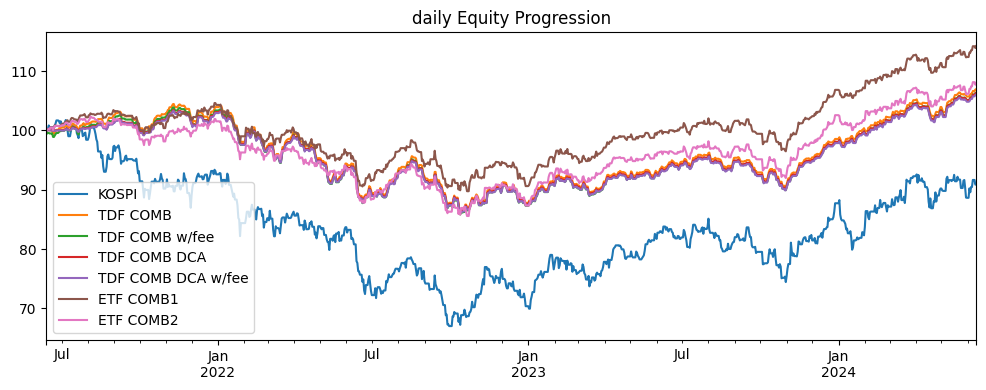

In [120]:
bts.run(figsize=(12,4))

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063616,0.063157,0.060573
cagr,-0.031001,0.022701,0.020805,0.020657,0.019828
max_drawdown,-0.341902,-0.174037,-0.174037,-0.16719,-0.167638
avg_drawdown,-0.120892,-0.020254,-0.022007,-0.022642,-0.019246
avg_drawdown_days,361.666667,73.714286,79.692308,93.727273,79.846154
daily_vol,0.168907,0.065375,0.065447,0.062148,0.062142
daily_sharpe,-0.106629,0.384331,0.354932,0.368015,0.354648
daily_sortino,-0.181655,0.61664,0.569367,0.588259,0.566921


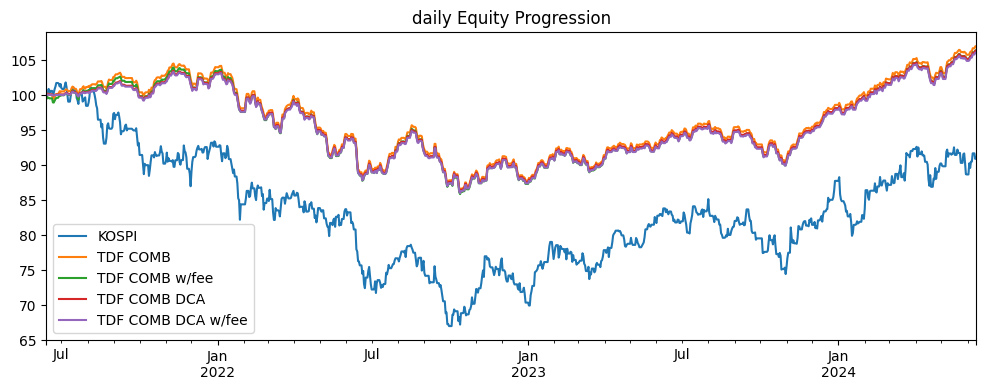

In [121]:
bts.run([0,1,2,3,4], figsize=(12,4))

,KOSPI,TDF COMB,TDF COMB DCA,ETF COMB1,ETF COMB2
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063157,0.142346,0.079898
cagr,-0.031001,0.022701,0.020657,0.045434,0.025995
max_drawdown,-0.341902,-0.174037,-0.16719,-0.142306,-0.164024
avg_drawdown,-0.120892,-0.020254,-0.022642,-0.011646,-0.013907
avg_drawdown_days,361.666667,73.714286,93.727273,35.821429,46.909091
daily_vol,0.168907,0.065375,0.062148,0.076027,0.078517
daily_sharpe,-0.106629,0.384331,0.368015,0.636573,0.373979
daily_sortino,-0.181655,0.61664,0.588259,1.046522,0.619614


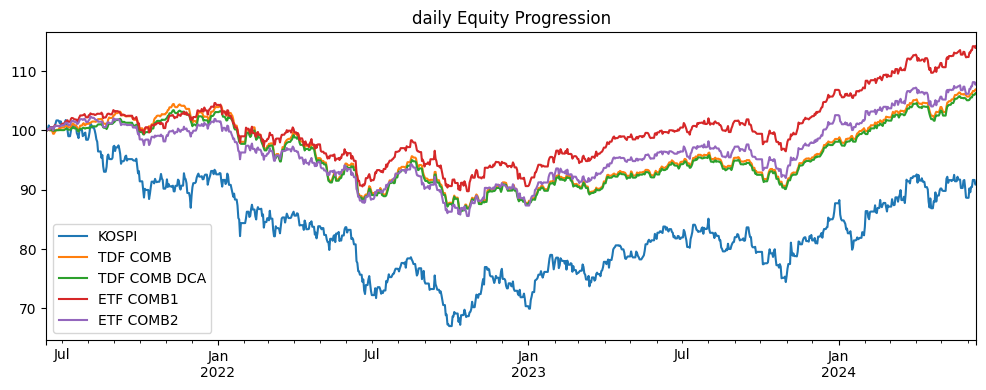

In [122]:
bts.run([0,1,3,5,6], figsize=(12,4))

In [123]:
bts.show_weights(name='ETF COMB1')

KODEX 200               0.2
KODEX 종합채권(AA-이상)액티브    0.2
KOSEF 국고채10년            0.3
KODEX 미국S&P500TR        0.3
dtype: float64